In [ ]:
from itertools import combinations, combinations_with_replacement

def find_a(s, m):
    out = []
    for one, a in combinations(s, 2):
        if (one*one)%m == one and (one*a)%m == a :
            out.append([one, a])
        one, a = a, one
        if (one*one)%m == one and (one*a)%m == a :
            out.append([one, a])
    return out


def find_a_2(s, m):
    out = []
    ones  = []
    asss = []
    for i in s:
        if (i*i)%m == i:
            ones.append(i)
        else:
            asss.append(i)
    if len(ones) == 0:
        return []

    for one in ones:
        for a in asss:

            tr = (a*a)%m 
            if a == tr:continue
            if a == one:continue
            if tr == one:continue

            if (tr*tr)%m != a:continue
            if (tr*a)%m != one:continue
            if (tr*one)%m != tr:continue

            if (one*a)%m == a:
                out.append([one, a])
    return out

def find_max_zero(m):
    out = []

    for i in range(2,m):
        count = []
        if (i*i)%m != i: continue
        for j in range(2,i+1):
            pr = (i*j)%m
            if pr == i:
                count.append(j)

        if len(count) >= 4:

            a = find_a_2(count, m)
            if len(a)==0: continue

            for d1, d2 in a:
                k = find_add(m, i, d1, d2)

                if len(k)!=0:
                    print(1)
                    for p in k:
                        if len(set((i, d1, d2, (d1*d2)%p))) >= 4:
                            out.append([m, p, i, d1, d2, (d1*d2)%p])
    return out
        

def find_add(modm, zero, one, a):
    
    tr = (a*a)%modm     

    max_moda = modm*4
    out = []

    

    #print('what ', modm, zero, one, a, tr)

    for i in range(max((tr, a, one, zero)), max_moda+1):
        
        if modm == i:continue

        if (one*a)%i  != tr:continue
        if (one*tr)%i != a:continue
        if (a*tr)%i   != one:continue

        if (zero*zero)%i != zero:continue
        if (one*one)%i   != zero:continue
        if (a*a)%i       != zero:continue
        if (tr*tr)%i     != zero:continue

        if (zero*zero)%i != zero:continue
        if (zero*one)%i  != one:continue
        if (zero*a)%i    != a:continue
        if (zero*tr)%i   != tr:continue
        
        out.append(i)
    return out

from tqdm import tqdm 
from random import randint
for i in tqdm(range(28457, 10**10)):
    #i = randint(40_000, 10**6)
    t = find_max_zero(i)
    if len(t) != 0:
        print(t)

  0%|          | 110680/9999999998 [5:29:50<2081554:55:59,  1.33it/s]

In [ ]:
sol = [4810, 4440, 2665, 1925, 445, 4145]
sol3 = [5522, 3012, 2761, 1255, 1757, 251]
sol2 = [4950, 3600, 3025, 2575, 1225, 775]

sol2 =[30, 18, 10, 16, 4]
#sol2 =[42, 28, 21, 7]

def print_m(m):
    print('[' + ',\n '.join(map(str, m)) + ']')

def check_gf4(s, n = 4):
    m_mult = lambda a,b: (a*b)%s[0]
    m_add  = lambda  a,b: (a*b)%s[1]

    m1 = [[0]*n for i in range(n)]
    for i in range(n):
        for j in range(n):

            t = m_mult(s[i+2], s[j+2])
            if t in s:
                m1[i][j] = t#s.index(t)-2
            else:
                m1[i][j] = 9

    m2 = [[0]*n for i in range(n)]
    for i in range(n):
        for j in range(n):
            
            t = m_add(s[i+2], s[j+2])
            if t in s:
                m2[i][j] = t#s.index(t)-2
            else:
                m2[i][j] = 9
    
    print_m(m1)
    print_m(m2)
    
check_gf4(sol2,3 )

   

[[10, 10, 10],
 [10, 16, 4],
 [10, 4, 16]]
[[10, 16, 4],
 [16, 4, 10],
 [4, 10, 16]]


In [ ]:
from itertools import product

def find_indeptents(m):
    out = []
    for i in range(2, m):
        if (i*i)%m == i:
            out.append(i)
    return out

def find_zeros(s, m):
    out = []
    tar = 3
    for i in s:
        c = []
        if (i*i)%m != i:
            continue
        for j in s:
            if (i*j)%m == i and i != j:
                c.append(j)
        if len(c) >= 3:
            out.append((i, c))
    return out

def find_ones(s, m):
    out = []
    tar = 3
    for i in s:
        c = []
        for j in s:
            if (i*j)%m == j and i != j:
                c.append(j)
        if len(c) >= 3:
            out.append((i, c))
    return out

def find_gf4(n):
    ind = find_indeptents(n)

    if len(ind) < 4: return []
        
    ones = find_ones(ind, n)


    if len(ones) == 0:return []

    cond = []
    for z, s in ones:

        cond.extend(find_1_a_1pa(z, n, s))

    if len(cond) != 0:
        print(cond)
    
    return []

def find_1_a_1pa(zero, mod, s):

    out = []

    for one, a, tr in product(s, repeat = 3):
        #print(one, a, tr)

        if (one*a)%mod  != tr:continue
        if (one*tr)%mod != a:continue
        if (a*tr)%mod   != one:continue

        if (zero*zero)%mod != zero:continue
        if (one*one)%mod   != zero:continue
        if (a*a)%mod       != zero:continue
        if (tr*tr)%mod     != zero:continue

        if (zero*zero)%mod != zero:continue
        if (zero*one)%mod  != one:continue
        if (zero*a)%mod    != a:continue
        if (zero*tr)%mod   != tr:continue

        out.append([zero, one, a, tr])

    return out



for i in range(2, 10**4):
    t = find_gf4(i)
    if len(t) != 0:
        print(t)


KeyboardInterrupt: ignored

In [ ]:
# GF2
# [42, 28, 21, 7]

def find_zeros(s, m):
    out = []
    tar = 1
    for i in s:
        c = []
        if (i*i)%m != i:
            continue
        for j in s:
            if (i*j)%m == i and i != j:
                c.append(j)
        if len(c) >= tar:
            out.append((i, c))
    return out

out = []
for i in range(2, 100):
    zer = find_zeros([i for i in range(1, i)], i)
    cand = []
    for z, s in zer:
        for j in s:
            if (j*j)%i == j and (j*z)%i == z :
                cand.append((z, j))
    
    for zero, one in cand:

        for m in range(2,i*i+1):
            if m == i: continue
            if (zero*zero)%m != zero:continue
            if (one*one)%m != zero:continue
            if (one*zero)%m != one:continue

            r = [i, m, zero, one]
            out.append(r)
            print(r)
    

[42, 28, 21, 7]
[60, 65, 40, 25]
[60, 195, 40, 25]
[60, 66, 45, 21]
[60, 132, 45, 21]
[66, 42, 22, 34]
[66, 77, 22, 55]
[66, 231, 22, 55]
[66, 88, 33, 55]
[66, 176, 33, 55]
[70, 77, 56, 21]
[70, 385, 56, 21]
[84, 70, 21, 49]
[84, 140, 21, 49]
[84, 70, 36, 64]
[84, 140, 36, 64]


In [ ]:
# GF3
# m = 30 n = 18 '0' = 10 '1' = 16 '2' = 4

def find_zeros(s, m):
    out = []
    tar = 1
    for i in s:
        c = []
        if (i*i)%m != i:
            continue
        for j in s:
            if (i*j)%m == i and i != j:
                c.append(j)
        if len(c) >= tar:
            out.append((i, c))
    return out

out = []
for i in range(2, 1000):
    zer = find_zeros([i for i in range(1, i)], i)
    cand = []
    for z, s in zer:
        for j in s:

            if (j*j)%i != j: continue

            for t in s:
                if (t*t)%i != j: continue
                if (t*j)%i != t: continue
                cand.append((z,j,t))
                
    
    for zero, one, tw in cand:

        for m in range(2,i*i):
            if m == i: continue

            if (zero*zero)%m != zero:continue
            if (one*one)%m != tw:continue
            if (one*zero)%m != one:continue

            if (tw*tw)%m != one:continue
            if (tw*one)%m != zero:continue
            if (tw*zero)%m != tw:continue
            r = [i, m, zero, one, tw]
            out.append(r )
            print(r )

[30, 18, 10, 16, 4]
[84, 63, 28, 49, 7]
[120, 156, 105, 81, 9]
[120, 312, 105, 81, 9]
[165, 135, 55, 100, 10]
[182, 234, 91, 169, 13]
[220, 385, 176, 121, 11]
[273, 234, 91, 169, 13]
[300, 225, 100, 25, 175]


KeyboardInterrupt: ignored

In [ ]:
def get_mods(t):
    return tuple(i for i in divisors(t**2-t) if i>t)

terms  = [0,]
from tqdm import tqdm 

for i in tqdm(range(1, 20)):
    c = []
    for j in range(i, i**2+1):
        if (i*i)%j == i: c.append(j)
    print(i, c, get_mods(i))

    terms.append(c)
print(terms)

100%|██████████| 19/19 [00:00<00:00, 1400.68it/s]

1 [] ()
2 [] ()
3 [6] (6,)
4 [6, 12] (6, 12)
5 [10, 20] (10, 20)
6 [10, 15, 30] (10, 15, 30)
7 [14, 21, 42] (14, 21, 42)
8 [14, 28, 56] (14, 28, 56)
9 [12, 18, 24, 36, 72] (12, 18, 24, 36, 72)
10 [15, 18, 30, 45, 90] (15, 18, 30, 45, 90)
11 [22, 55, 110] (22, 55, 110)
12 [22, 33, 44, 66, 132] (22, 33, 44, 66, 132)
13 [26, 39, 52, 78, 156] (26, 39, 52, 78, 156)
14 [26, 91, 182] (26, 91, 182)
15 [21, 30, 35, 42, 70, 105, 210] (21, 30, 35, 42, 70, 105, 210)
16 [20, 24, 30, 40, 48, 60, 80, 120, 240] (20, 24, 30, 40, 48, 60, 80, 120, 240)
17 [34, 68, 136, 272] (34, 68, 136, 272)
18 [34, 51, 102, 153, 306] (34, 51, 102, 153, 306)
19 [38, 57, 114, 171, 342] (38, 57, 114, 171, 342)
[0, [], [], [6], [6, 12], [10, 20], [10, 15, 30], [14, 21, 42], [14, 28, 56], [12, 18, 24, 36, 72], [15, 18, 30, 45, 90], [22, 55, 110], [22, 33, 44, 66, 132], [26, 39, 52, 78, 156], [26, 91, 182], [21, 30, 35, 42, 70, 105, 210], [20, 24, 30, 40, 48, 60, 80, 120, 240], [34, 68, 136, 272], [34, 51, 102, 153, 306], [3

651


In [ ]:
terms  = []
for i in range(2, 20):
    c = []
    for j in range(i):
        if (j*j)%i == j: c.append(j)
    print(i, c)
    terms.append(len(c))
print(terms)

2 [0, 1]
3 [0, 1]
4 [0, 1]
5 [0, 1]
6 [0, 1, 3, 4]
7 [0, 1]
8 [0, 1]
9 [0, 1]
10 [0, 1, 5, 6]
11 [0, 1]
12 [0, 1, 4, 9]
13 [0, 1]
14 [0, 1, 7, 8]
15 [0, 1, 6, 10]
16 [0, 1]
17 [0, 1]
18 [0, 1, 9, 10]
19 [0, 1]
[2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2]


In [7]:
# GF4
from tqdm import tqdm 
from sympy import divisors

def find_zeros(s, m):
    out = []
    tar = 2
    for i in s:
        c = []
        if (i*i)%m != i:
            continue
        for j in s:
            if (i*j)%m == i and i != j:
                c.append(j)
        if len(c) >= tar:
            out.append((i, c))
    return out

def get_mods(t):
    return tuple(i for i in divisors(t**2-t) if i>t)

d = dict()
out = []

for i in tqdm(range(5428 + 900 + 125, 10**6)):
    zer = find_zeros([i for i in range(2, i)], i)
    cand = []

    if i%100 == 0:print(len(d))

    for z, s in zer:
        for j in s:

            for t in s:
                if (t*j)%i != t: continue
                if t == j: continue

                for tr in s:
                    if tr == j: continue
                    if tr == t: continue

                    if (tr*j)%i  != tr: continue
                    if (tr*t)%i  != j: continue
                    if (tr*tr)%i != t: continue

                    cand.append((z, j, t, tr))
                
    for zero, one, tw, tr in cand:

        r = d.get(zero, [])

        if len(r) == 0:
            r = get_mods(zero)
            d[zero] = r

        for m in r:

            if m <= zero or m <= one or m <= tw or m <= tr:continue
            if m == i: continue

            if (zero*zero)%m != zero:continue
            if (one*one)%m   != zero:continue
            if (tw*tw)%m     != zero:continue
            if (tr*tr)%m     != zero:continue

            #if (zero*zero)%m != zero:continue
            if (zero*one)%m  != zero:continue
            if (zero*tw)%m   != zero:continue
            if (zero*tr)%m   != zero:continue

            if (one*tw)%m  != tr:continue
            if (one*tr)%m  != tw:continue
            if (tw*tr)%m   != one:continue

            out.append([i, m, zero, one, tw, tr])
            print(i, m, zero, one, tw, tr)

  0%|          | 71/993672 [04:35<1252:10:47,  4.54s/it]

97


  0%|          | 126/993672 [08:08<1069:12:36,  3.87s/it]


KeyboardInterrupt: ignored

In [ ]:
# GF4
from tqdm import tqdm 
from sympy import divisors
terms = []

def find_zeros(s, m):
    out = []
    tar = 2
    for i in s:
        c = []
        if (i*i)%m != i:
            continue
        for j in s:
            if (i*j)%m == i and i != j:
                c.append(j)
        if len(c) >= tar:
            out.append((i, c))
    return out

def get_mods(t):
    return tuple(i for i in divisors(t**2-t) if i>t)

d = dict()
out = []

for i in tqdm(range(0, 2000)):
    zer = find_zeros([i for i in range(2, i)], i)
    cand = []

    #if i%100 == 0:print(len(d))

    for z, s in zer:
        for j in s:

            for t in s:
                if (t*j)%i != t: continue
                if t == j: continue

                for tr in s:
                    if tr == j: continue
                    if tr == t: continue

                    if (tr*j)%i  != tr: continue
                    if (tr*t)%i  != j: continue
                    if (tr*tr)%i != t: continue

                    cand.append((z, j, t, tr))
                
    for zero, one, tw, tr in cand:

        r = d.get(zero, [])

        terms.append(zero)

        if len(r) == 0:
            r = get_mods(zero)
            d[zero] = r

        for m in r:

            if m <= zero or m <= one or m <= tw or m <= tr:continue
            if m == i: continue

            if (zero*zero)%m != zero:continue
            if (one*one)%m   != zero:continue
            if (tw*tw)%m     != zero:continue
            if (tr*tr)%m     != zero:continue

            #if (zero*zero)%m != zero:continue
            if (zero*one)%m  != zero:continue
            if (zero*tw)%m   != zero:continue
            if (zero*tr)%m   != zero:continue

            if (one*tw)%m  != tr:continue
            if (one*tr)%m  != tw:continue
            if (tw*tr)%m   != one:continue

            out.append([i, m, zero, one, tw, tr])
            print(i, m, zero, one, tw, tr)

print(sorted(d.keys()))

 51%|█████     | 1020/2000 [00:34<00:33, 29.49it/s]


KeyboardInterrupt: ignored

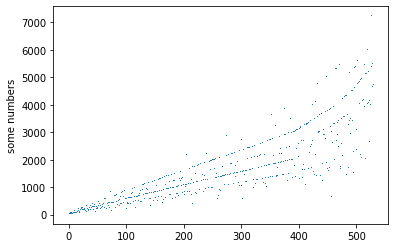

In [9]:
t = [14, 18, 21, 26, 28, 35, 36, 38, 39, 42, 45, 52, 54, 56, 57, 63, 65, 70, 72, 76, 77, 78, 84, 86, 90, 91, 93, 95, 98, 99, 105, 108, 111, 112, 117, 119, 122, 124, 126, 129, 130, 133, 134, 135, 140, 143, 144, 146, 147, 148, 153, 154, 155, 156, 161, 162, 171, 172, 175, 183, 185, 186, 189, 190, 195, 196, 201, 203, 206, 207, 208, 209, 210, 215, 216, 217, 218, 219, 221, 222, 225, 231, 237, 238, 244, 245, 247, 248, 259, 260, 261, 266, 268, 273, 279, 280, 285, 286, 287, 288, 291, 292, 296, 297, 299, 301, 304, 305, 306, 309, 310, 315, 316, 322, 323, 324, 325, 326, 327, 329, 333, 335, 336, 341, 342, 344, 351, 357, 364, 365, 366, 369, 370, 371, 372, 377, 378, 381, 385, 386, 387, 388, 392, 395, 396, 399, 403, 405, 406, 407, 412, 413, 414, 416, 417, 418, 423, 427, 429, 430, 436, 437, 441, 442, 448, 453, 455, 456, 459, 465, 469, 471, 473, 474, 475, 476, 477, 481, 483, 485, 486, 489, 490, 494, 495, 496, 497, 507, 508, 511, 513, 515, 516, 518, 520, 525, 527, 531, 532, 533, 536, 539, 540, 543, 545, 546, 549, 551, 553, 555, 556, 559, 560, 567, 574, 576, 579, 581, 582, 584, 585, 589, 592, 595, 597, 598, 603, 604, 609, 610, 611, 612, 616, 621, 623, 624, 627, 628, 629, 630, 633, 635, 637, 639, 645, 646, 650, 651, 652, 657, 658, 663, 665, 666, 669, 670, 671, 672, 675, 676, 679, 682, 686, 687, 688, 689, 693, 695, 700, 703, 707, 711, 713, 714, 715, 721, 723, 724, 730, 731, 735, 737, 738, 741, 742, 747, 749, 754, 755, 756, 760, 763, 765, 767, 772, 775, 776, 777, 779, 780, 783, 784, 785, 790, 791, 792, 793, 796, 801, 803, 804, 805, 806, 813, 814, 815, 817, 819, 826, 831, 832, 833, 834, 836, 837, 844, 845, 846, 847, 849, 851, 855, 861, 868, 869, 871, 873, 874, 875, 876, 889, 891, 892, 893, 896, 897, 899, 900, 903, 905, 906, 909, 910, 915, 916, 917, 918, 921, 923, 924, 925, 927, 931, 936, 939, 945, 946, 949, 950, 952, 959, 963, 964, 965, 966, 969, 970, 973, 975, 976, 980, 981, 987, 988, 989, 990, 993, 994, 995, 999, 1001, 1005, 1008, 1015, 1016, 1023, 1026, 1030, 1036, 1044, 1045, 1053, 1054, 1066, 1071, 1072, 1075, 1078, 1080, 1084, 1086, 1089, 1090, 1102, 1105, 1106, 1108, 1113, 1116, 1120, 1131, 1132, 1134, 1140, 1144, 1161, 1162, 1168, 1170, 1176, 1184, 1185, 1190, 1196, 1197, 1204, 1209, 1216, 1221, 1222, 1225, 1228, 1236, 1240, 1242, 1246, 1248, 1252, 1254, 1256, 1258, 1264, 1269, 1270, 1274, 1281, 1288, 1296, 1300, 1309, 1314, 1316, 1324, 1326, 1330, 1332, 1340, 1344, 1350, 1364, 1365, 1376, 1377, 1395, 1404, 1407, 1413, 1422, 1425, 1426, 1435, 1442, 1443, 1444, 1449, 1456, 1458, 1464, 1470, 1476, 1485, 1495, 1505, 1520, 1521, 1525, 1530, 1534, 1540, 1548, 1573, 1581, 1596, 1599, 1615, 1617, 1625, 1634, 1645, 1648, 1652, 1665, 1666, 1674, 1680, 1701, 1702, 1705, 1716, 1720, 1729, 1750, 1764, 1768, 1776, 1786, 1806, 1834, 1854, 1881]

# import matplotlib.pyplot as plt
# plt.plot(terms, ',')
# plt.plot(sorted(d.keys()), ',')
# # plt.yscale('log')
# plt.ylabel('some numbers')
# plt.show()

from sympy import primefactors, factorint

import matplotlib.pyplot as plt
plt.plot([sum( i/j for j in factorint(i).values()) for i in t], ',')
# plt.plot(sorted(d.keys()), ',')
# # plt.yscale('log')
plt.ylabel('some numbers')
plt.show()

In [ ]:
from typing_extensions import TypeVarTuple
def find_ones(s, m):
    out = []
    for i in s:
        c = []
        if (i*i)%m != i: continue
        for j in s:
            if (i*j)%m == j and i != j:
                c.append(j)
        if len(c) >= 1:
            out.append((i, c))
    return out

out = set()
def extract_semigroup(s, target, m):

    if len(s) == 0:
        return

    if len(target) > 1:
        out.add(tuple(sorted(target)) )
    for i in range(len(s)):
        new_s = s.copy()
        t = new_s.pop(i)
        c = True
        for j in target:
            if (t*j)%m not in target:
                if (t*j)%m != t:
                    c = False
                    break
        if c:
            n_target = target.copy()
            n_target.append(t)
            extract_semigroup(new_s,n_target,m)

# extract_semigroup([0,3,4,5,6,7,],[ 1,], 8)
# print(out)
for i in range(2, 100):
    ones = find_ones([i for i in range(0, i)], i)
    c = 0
    non_one_monoids = []
    one_monoids = []
    for one, s in ones:
        out = set()
        extract_semigroup(s, [one,], i)
        if len(out) != 0:
            #print(i, one, out)
            if one != 1:
                non_one_monoids.append([i, one, out])
            else:
                one_monoids.append([i, one, out])
    
    if len(non_one_monoids) >0:
        crm = [k for j in non_one_monoids for k in j[2]]
        s = set([len(j) for j in one_monoids[0][2]])
        s2 = set([len(j) for j in crm])
        print(i, s,s2)




        

6 {2, 3, 4, 5} {2}
10 {2, 3, 4, 5, 6, 7, 8, 9} {2, 3, 4}
12 {2, 3, 4, 5, 6, 7, 8, 9, 10} {2, 3}
14 {2, 3, 4, 5, 6, 7, 8} {2, 3, 4}
15 {2, 3, 4, 5, 6, 7, 8, 9, 10, 11} {2, 3, 4}
18 {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} {2, 3, 4, 5, 6}


KeyboardInterrupt: ignored

In [ ]:
from itertools import combinations_with_replacement
out = set()
def extract_cand(s, target, m):
    if len(s) == 0:return
    h = tuple(sorted(target))
    if h in out: return
    if len(target) >= 1:out.add(h)
    for i in range(len(s)):
        new_s = s.copy()
        t = new_s.pop(i)
        c = True
        for j in target:
            if (t*j)%m not in target and (t*j)%m != t:
                c = False
                break
        if c :
            n_target = target.copy()
            n_target.append(t)
            extract_cand(new_s,n_target,m)

def filter_sem(s,m):
    if len(s) == 1: return (s[0]**2)%m in s
    for a,b in combinations_with_replacement(s, 2):
        if (a*b)%m not in s:
            return False
    return True

for n in range(2,20):
    out = set()
    s = [i for i in range(n)]
    extract_cand(s, [], n)
    #print(len(out))
    out = [i for i in out if filter_sem(i, n)]
    print(len(out))
    #print(out)

2
4
7
6
25
7
25
17
41
5
153
9
39
89
127
7
175
7
